# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

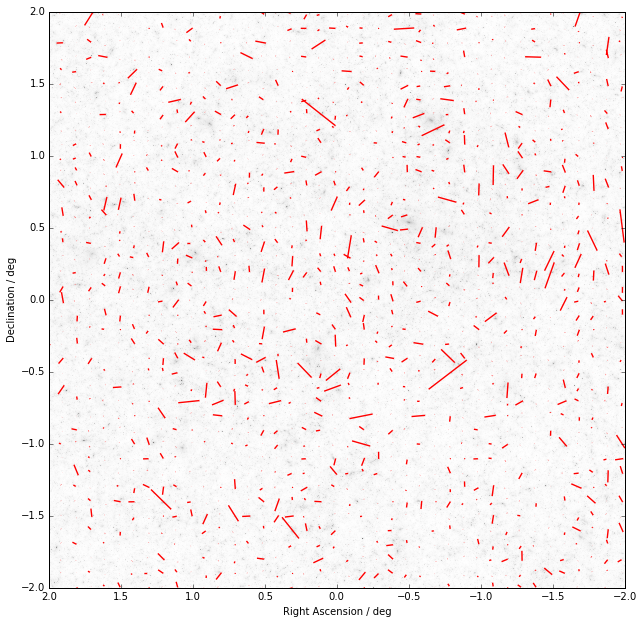

In [7]:
K.plot()
S.plot()

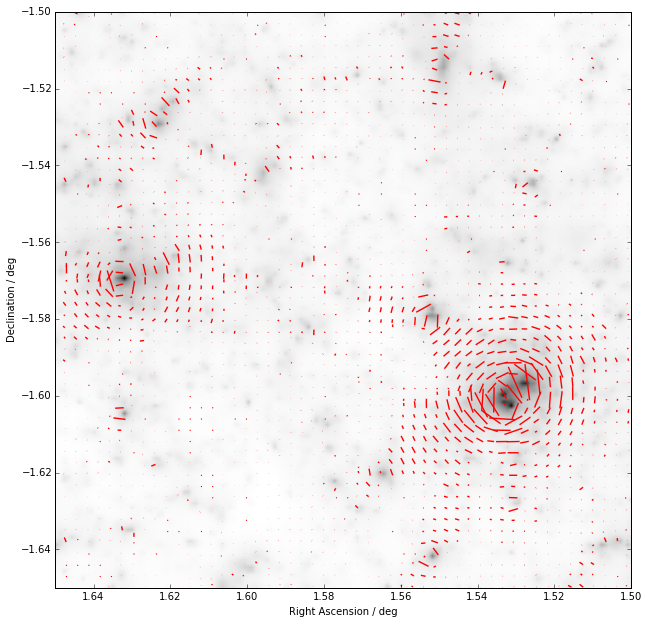

In [8]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

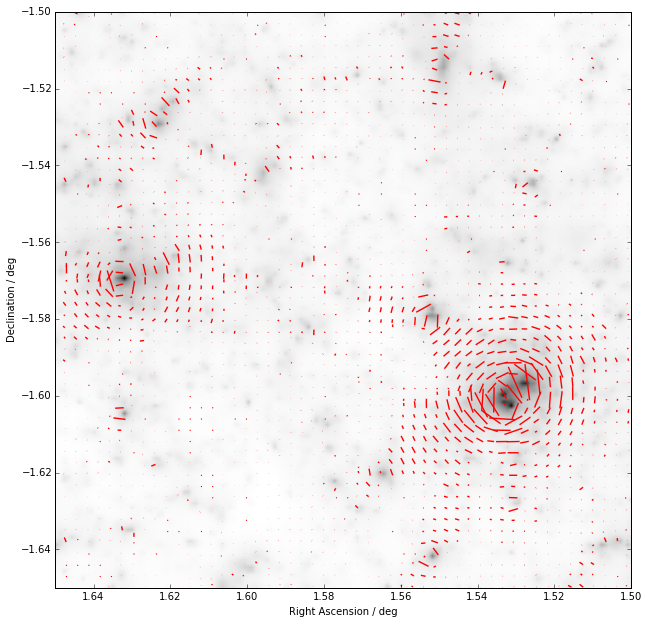

In [9]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

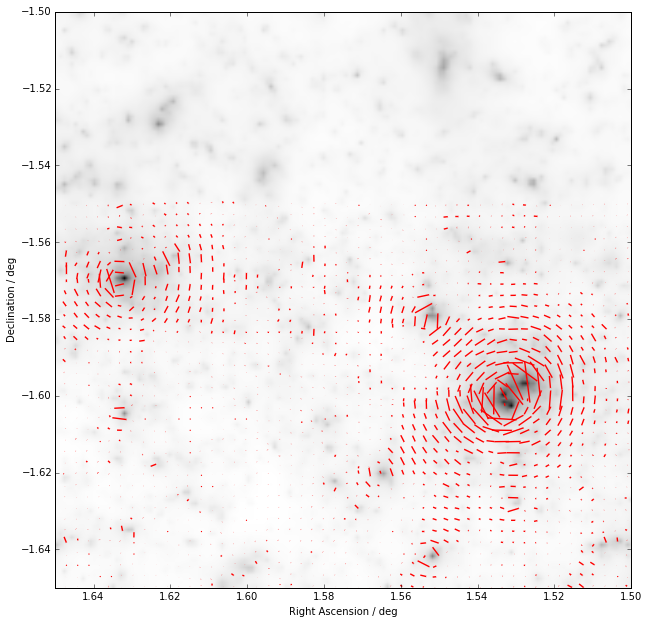

In [10]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

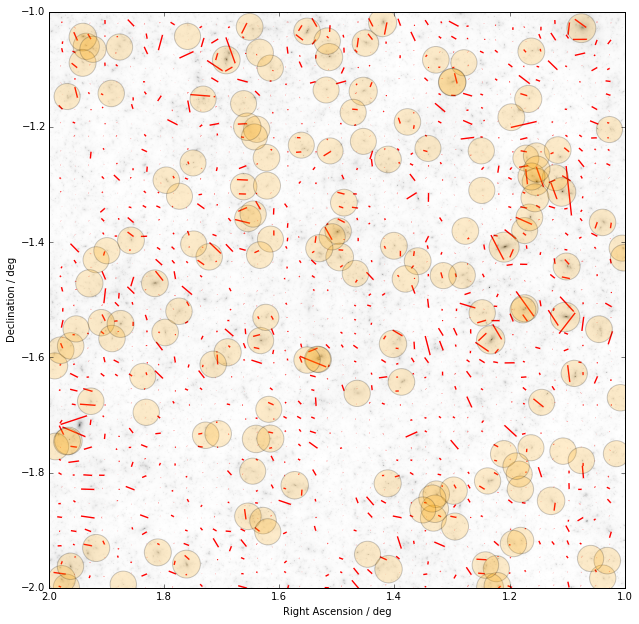

In [11]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_cutoff=[10**11,10**12])

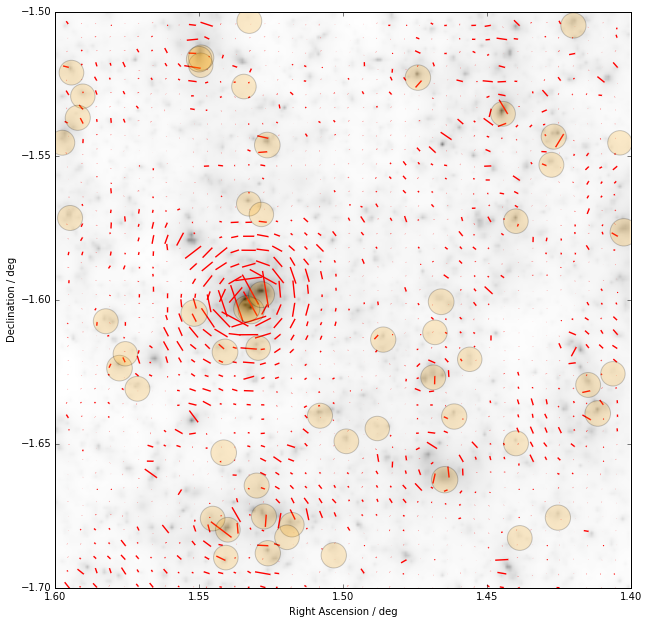

In [12]:
# Zoomed in:
K.plot(subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_cutoff=[10**10.75,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

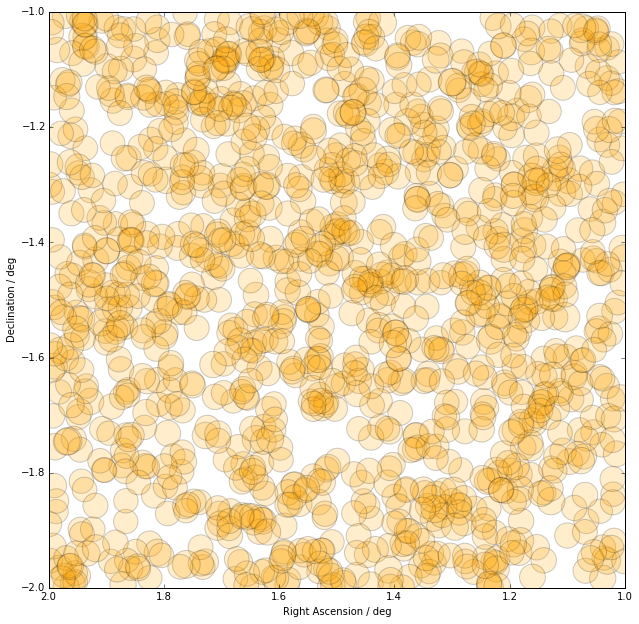

In [13]:
F.plot(mass_cutoff=[10**10.75,10**12])

## Scratch pad

In [10]:
mag_cutoff = 21.5
nra = -np.rad2deg(cat.data['nRA'][cat.data['mag']<mag_cutoff])
dec = np.rad2deg(cat.data['Dec'][cat.data['mag']<mag_cutoff])

pix_nra = [K.world2image(a,0)[0] for a in nra]
pix_dec = [K.world2image(0,d)[1] for d in dec]

mags = cat.data['mag'][cat.data['mag']<mag_cutoff]
size = [500/i for i in mags]

NameError: name 'cat' is not defined

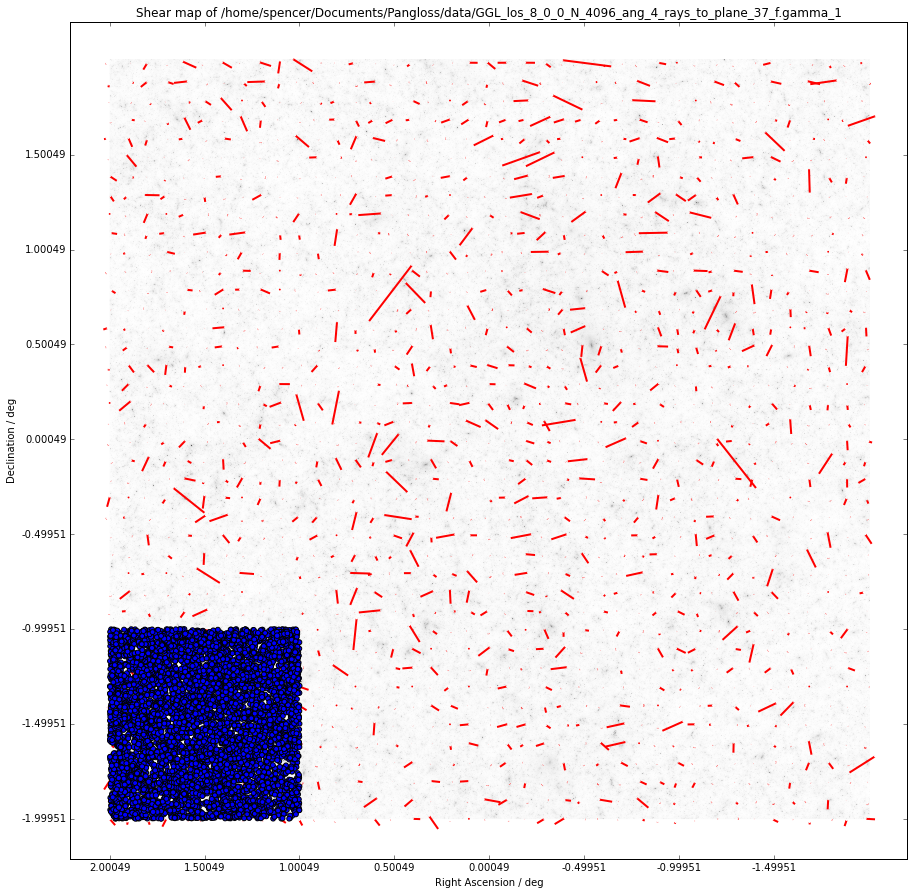

In [20]:
K.plot(15)
S.plot(15)
plt.scatter(pix_nra,pix_dec,s=size)

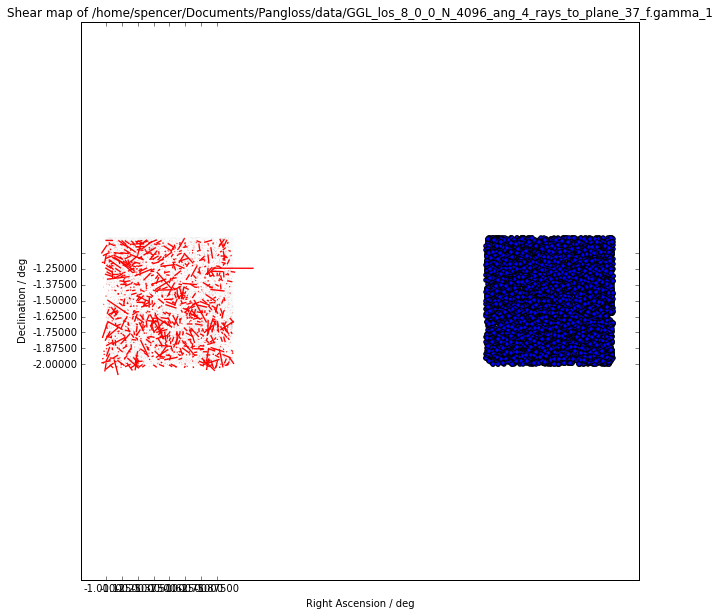

In [22]:
K.plot(10,[-1,-2,-2,-1])
S.plot(10,[-1,-2,-2,-1])

mag_cutoff = 21.5
nra = np.rad2deg(cat.data['nRA'][cat.data['mag']<mag_cutoff])
dec = np.rad2deg(cat.data['Dec'][cat.data['mag']<mag_cutoff])

pix_nra = [K.world2image(a,0)[0] for a in nra]
pix_dec = [K.world2image(0,d)[1] for d in dec]

plt.scatter(pix_nra,pix_dec)

In [40]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
f = ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

NameError: name 'Configuration' is not defined

('ra:', (25191,), 'dec:', (25191,), 'mags:', (25191,))


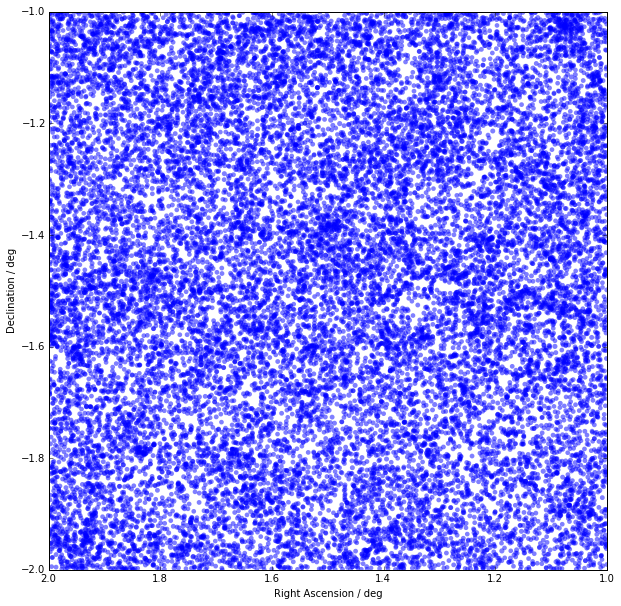

In [21]:
f.plotForeground(10,[0,23])

In [19]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
g = Catalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

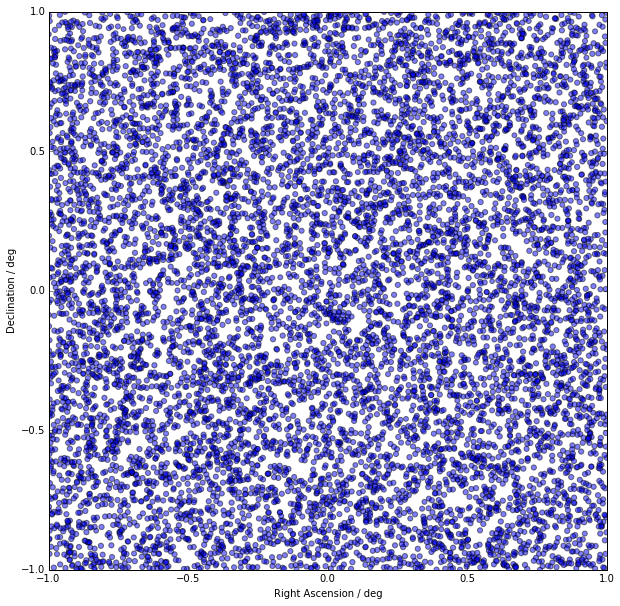

In [20]:
domain = None
N = 10000
mag_cut = [24,0]
mass_cut = [10**5,10**12]
z_cut = [0,1.3857]
plot = True
g.generate(domain,N,mag_cut,mass_cut,z_cut,plot)